In [1]:
pwd

'C:\\Users\\zahra'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

sns.set(style="whitegrid")

In [3]:
file_paths = {
    "2014": r"C:\Users\zahra\Downloads\archive\2014_Financial_Data.csv",
    "2015": r"C:\Users\zahra\Downloads\archive\2015_Financial_Data.csv",
    "2016": r"C:\Users\zahra\Downloads\archive\2016_Financial_Data.csv",
    "2017": r"C:\\Users\zahra\Downloads\archive\2017_Financial_Data.csv",
    "2018": r"C:\\Users\zahra\Downloads\archive\2018_Financial_Data.csv",
}

In [4]:
dfs = {year: pd.read_csv(file) for year, file in file_paths.items()}

for year, df in dfs.items():
    df["year"] = int(year)
    dfs[year] = df.reset_index(drop=True)

common_columns = set.intersection(*(set(df.columns) for df in dfs.values()))
dfs_aligned = {year: df[common_columns] for year, df in dfs.items()}
df_combined = pd.concat(dfs_aligned.values(), ignore_index=True)

In [5]:
selected_ratios = ["pe_ratio", "roe", "profit_margin", "ebitda_margin"]

In [6]:
print("Dataset Overview:")
print(df.info())  
print("\nShape of the Dataset:", df.shape)

print("\nFirst 5 Rows:")
print(df.head())
print("\nLast 5 Rows:")
print(df.tail())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 226 entries, Unnamed: 0 to year
dtypes: float64(222), int64(2), object(2)
memory usage: 7.6+ MB
None

Shape of the Dataset: (4392, 226)

First 5 Rows:
  Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0      CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1        KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2       INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3         MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4         GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1  0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2  1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3

In [7]:
selected_ratios = ["priceEarningsRatio", "ROE", "Profit Margin", "EBITDA Margin"]

In [8]:
print("\nSummary Statistics for Key Ratios:")
print(df_combined[selected_ratios].describe())


Summary Statistics for Key Ratios:
       priceEarningsRatio           ROE  Profit Margin  EBITDA Margin
count        19801.000000  1.973700e+04   19633.000000   19630.000000
mean            37.841048  1.646107e+03      -9.307057      -8.880591
std            853.473496  1.148279e+05     243.205468     239.625361
min              0.000000 -3.477246e+04  -24414.000000  -24207.000000
25%              0.000000 -6.620000e-02      -0.042000       0.021000
50%             12.951500  7.120000e-02       0.043000       0.129909
75%             23.422400  1.460000e-01       0.133000       0.302800
max         105828.712900  1.114114e+07    3090.870000    3090.870000


In [9]:
print(df.describe(include="all"))

       Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  \
count        4392  4.346000e+03     4253.000000     4.207000e+03   
unique       4392           NaN             NaN              NaN   
top         CMCSA           NaN             NaN              NaN   
freq            1           NaN             NaN              NaN   
mean          NaN  5.119287e+09        3.455278     3.144946e+09   
std           NaN  2.049504e+10      195.504906     1.508813e+10   
min           NaN -6.894100e+07       -3.461500    -2.669055e+09   
25%           NaN  6.501425e+07        0.000000     3.415500e+06   
50%           NaN  4.982640e+08        0.074900     1.741180e+08   
75%           NaN  2.457878e+09        0.188500     1.297814e+09   
max           NaN  5.003430e+11    12739.000000     3.733960e+11   

        Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  \
count   4.328000e+03  4.155000e+03  4.226000e+03        4.208000e+03   
unique           NaN           NaN     

In [10]:
common_columns = set.intersection(*(set(df.columns) for df in dfs.values())).union({"year"})
dfs_aligned = {year: df[common_columns] for year, df in dfs.items()}
df_combined = pd.concat(dfs_aligned.values(), ignore_index=True)

In [11]:
missing_values = df_combined.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values = missing_values.to_frame(name="Missing Count")
missing_values["% Missing"] = (missing_values["Missing Count"] / len(df_combined)) * 100
display(missing_values.head(15))  # Show only top 15 missing values

,Missing Count,% Missing
operatingCycle,22058,99.913938
cashConversionCycle,22058,99.913938
shortTermCoverageRatios,10744,48.666033
10Y Shareholders Equity Growth (per Share),9680,43.846537
10Y Revenue Growth (per Share),9532,43.176156
10Y Net Income Growth (per Share),9532,43.176156
10Y Operating CF Growth (per Share),9478,42.931558
10Y Dividend per Share Growth (per Share),9177,41.568148
dividendPayoutRatio,9079,41.124247
priceEarningsToGrowthRatio,9079,41.124247


In [12]:
missing_columns = [col for col in selected_ratios if col not in df_combined.columns]

if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    print("All selected ratios are present!")

All selected ratios are present!


In [13]:
df_combined = df_combined.dropna(subset=selected_ratios)

In [14]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                0
Revenue                  46
Revenue Growth          139
Cost of Revenue         185
Gross Profit             64
                       ... 
SG&A Expenses Growth    248
Sector                    0
2019 PRICE VAR [%]        0
Class                     0
year                      0
Length: 226, dtype: int64


In [15]:
print("\nMissing Values in Key Ratios:")
print(df_combined[selected_ratios].isnull().sum())


Missing Values in Key Ratios:
priceEarningsRatio    0
ROE                   0
Profit Margin         0
EBITDA Margin         0
dtype: int64


In [16]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [17]:
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
Unnamed: 0              4392
Revenue                 4104
Revenue Growth          2977
Cost of Revenue         3288
Gross Profit            4094
                        ... 
SG&A Expenses Growth    2924
Sector                    11
2019 PRICE VAR [%]      4381
Class                      2
year                       1
Length: 226, dtype: int64


# EDA

In [18]:
df_combined["PE ratio"] = winsorize(df_combined["PE ratio"], limits=[0.01, 0.01]) 

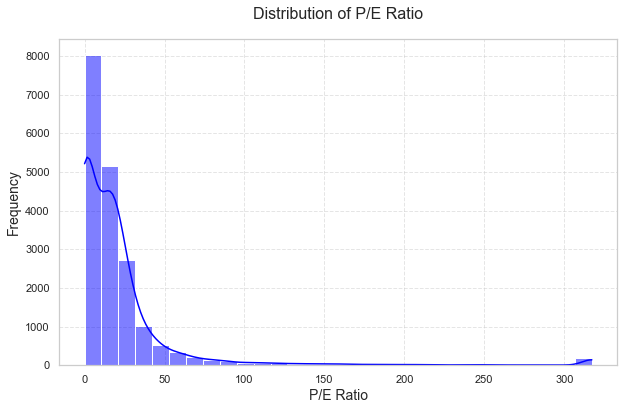

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined["PE ratio"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of P/E Ratio", fontsize=16, pad=20)
plt.xlabel("P/E Ratio", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

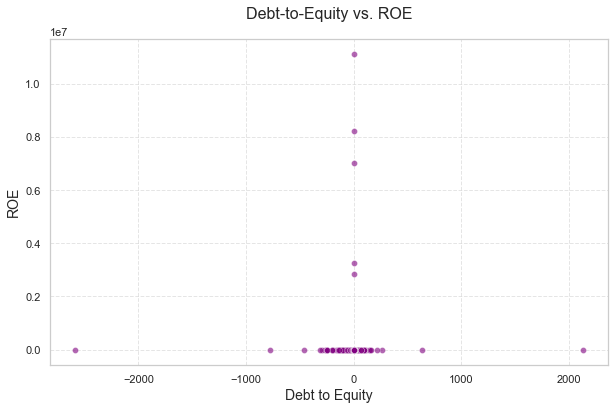

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_combined["Debt to Equity"], y=df_combined["ROE"],
    alpha=0.6, color="purple"
)
plt.title("Debt-to-Equity vs. ROE", fontsize=16, pad=20)
plt.xlabel("Debt to Equity", fontsize=14)
plt.ylabel("ROE", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

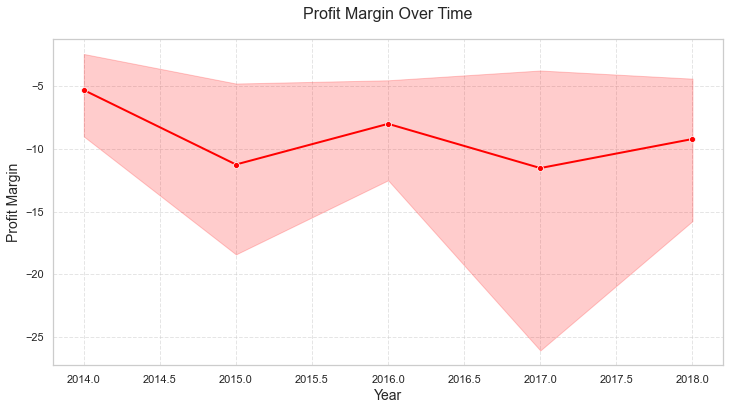

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="year", y="Profit Margin", data=df_combined,
    marker="o", linewidth=2, color="red"
)
plt.title("Profit Margin Over Time", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Profit Margin", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

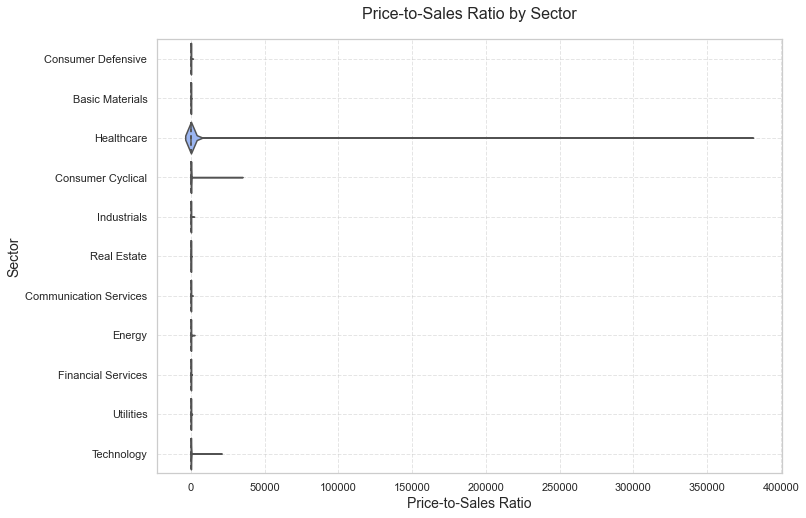

In [22]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    x="priceSalesRatio", y="Sector", data=df_combined,
    scale="width", inner="quartile", palette="coolwarm"
)
plt.title("Price-to-Sales Ratio by Sector", fontsize=16, pad=20)
plt.xlabel("Price-to-Sales Ratio", fontsize=14)
plt.ylabel("Sector", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout(pad=3.0) 
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="year",
    y="Market Cap",  # Corrected column name
    data=df_combined,
    marker="o",
    linewidth=2,
    color="brown"
)
plt.yscale("log")
plt.title("Market Capitalisation Over Time", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Market Cap (Log Scale)", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout(pad=3.0)
plt.show()

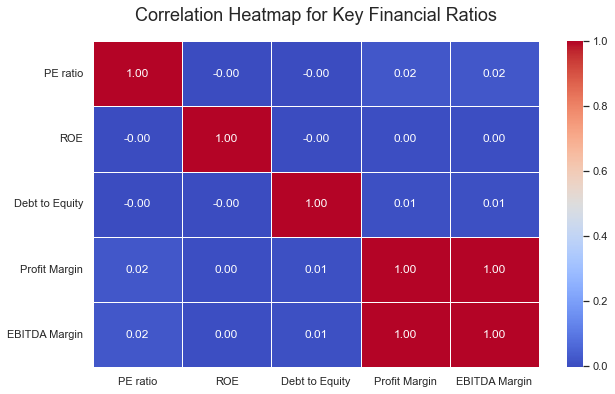

In [24]:
selected_ratios = ["PE ratio", "ROE", "Debt to Equity", "Profit Margin", "EBITDA Margin"]  # Adjust based on dataset
numerical_cols = [col for col in selected_ratios if col in df_combined.columns]

plt.figure(figsize=(10, 6))
correlation = df_combined[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Key Financial Ratios", fontsize=18, pad=20)
plt.show()

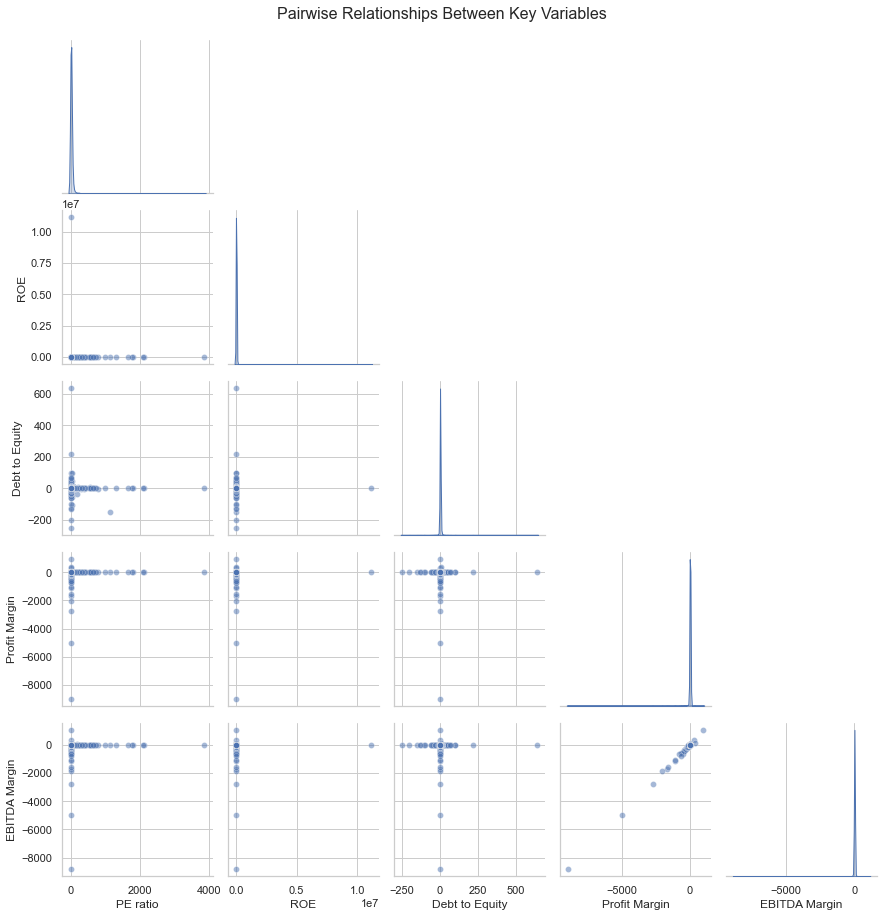

In [25]:
key_vars = numerical_cols[:5] 
sns.pairplot(df[key_vars].dropna(), diag_kind="kde", corner=True, plot_kws={"alpha": 0.5})
plt.suptitle("Pairwise Relationships Between Key Variables", y=1.02, fontsize=16)
plt.show()

# Data visualisation

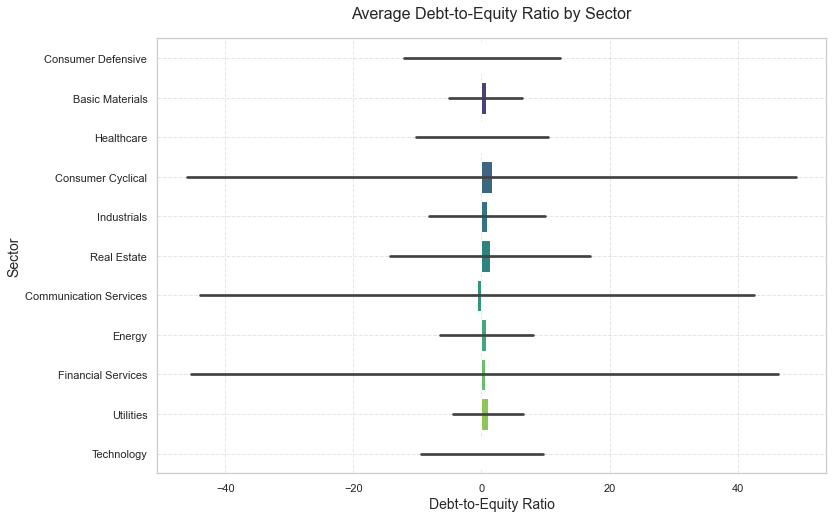

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(
    y="Sector", 
    x="Debt to Equity", 
    data=df_combined,
    estimator=np.mean, 
    ci="sd", 
    palette="viridis"
)
plt.title("Average Debt-to-Equity Ratio by Sector", fontsize=16, pad=20)
plt.xlabel("Debt-to-Equity Ratio", fontsize=14)
plt.ylabel("Sector", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

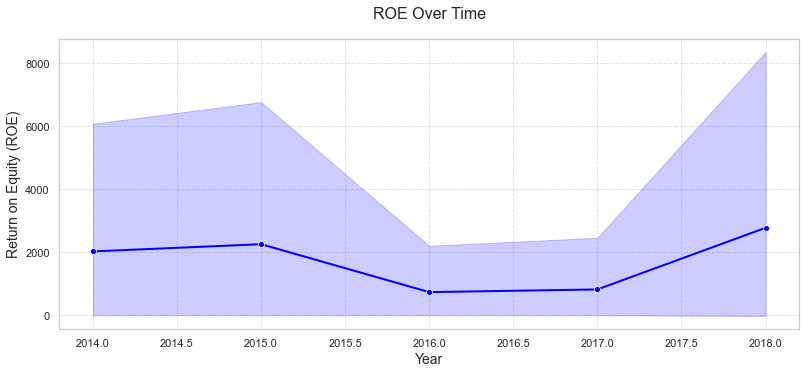

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_combined,
    x="year",
    y="ROE",  
    marker="o",
    linewidth=2,
    color="blue"
)
plt.title("ROE Over Time", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Return on Equity (ROE)", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout(pad=3.0)  
plt.show()

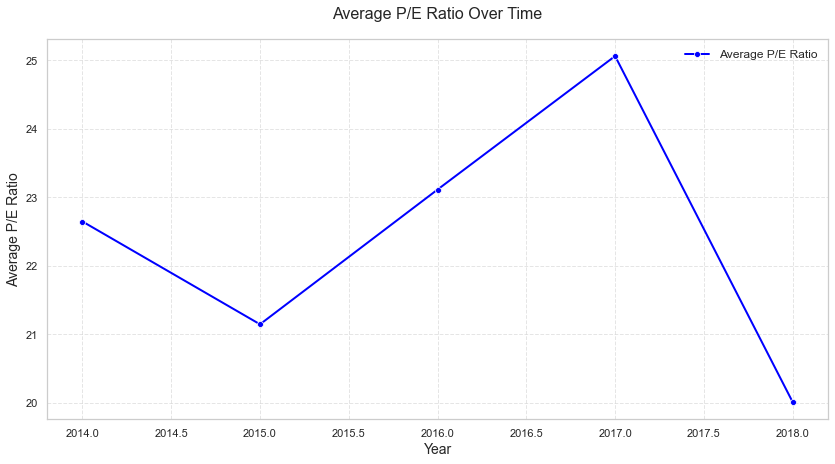

In [28]:
if "year" in df_combined.columns and "PE ratio" in df_combined.columns:
    df_pe_avg = df_combined.groupby("year")["PE ratio"].mean().reset_index()
    x_values = df_pe_avg["year"]
    y_values = df_pe_avg["PE ratio"]

    plt.figure(figsize=(14, 7))
    sns.lineplot(x=x_values, y=y_values, marker="o", linewidth=2, label="Average P/E Ratio", color="blue")
    plt.title("Average P/E Ratio Over Time", fontsize=16, pad=20)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Average P/E Ratio", fontsize=14)
    plt.grid(visible=True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=12, loc="upper right", frameon=False)
    plt.show()
else:
    print("Error: 'year' or 'PE ratio' column not found in df_combined.")


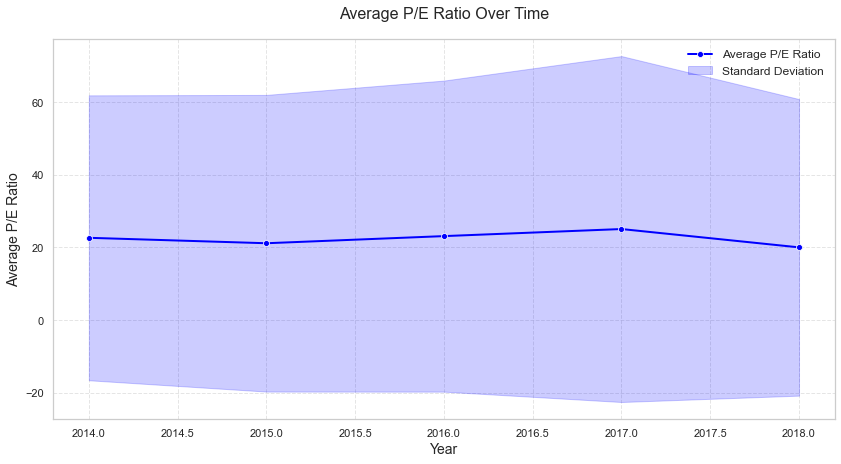

In [29]:
if "year" in df_combined.columns and "PE ratio" in df_combined.columns:
    df_pe_avg = df_combined.groupby("year")["PE ratio"].agg(["mean", "std"]).reset_index()
    x_values = df_pe_avg["year"]
    y_values = df_pe_avg["mean"]
    std_dev = df_pe_avg["std"]

    plt.figure(figsize=(14, 7))
    sns.lineplot(x=x_values, y=y_values, marker="o", linewidth=2, label="Average P/E Ratio", color="blue")
    plt.fill_between(x_values, y_values - std_dev, y_values + std_dev, alpha=0.2, color="blue", label="Standard Deviation")
    plt.title("Average P/E Ratio Over Time", fontsize=16, pad=20)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Average P/E Ratio", fontsize=14)
    plt.grid(visible=True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=12, loc="upper right", frameon=False)
    plt.show()
else:
    print("Error: 'year' or 'PE ratio' column not found in df_combined.")


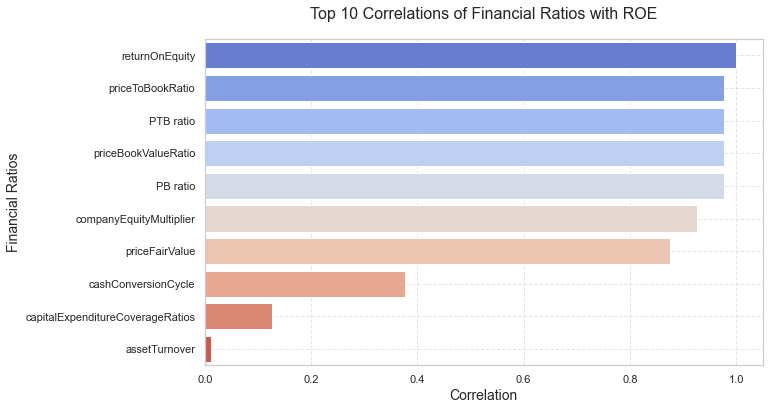

In [30]:
numerical_cols = df_combined.select_dtypes(include=['number']).columns
corr = df_combined[numerical_cols].corr()

correlation_with_roe = corr["ROE"].drop("ROE").sort_values(key=abs, ascending=False)
top_corr_with_roe = correlation_with_roe.head(10).index
top_correlation_with_roe = correlation_with_roe[top_corr_with_roe]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlation_with_roe.values, y=top_correlation_with_roe.index, palette="coolwarm")
plt.title("Top 10 Correlations of Financial Ratios with ROE", fontsize=16, pad=20)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Financial Ratios", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

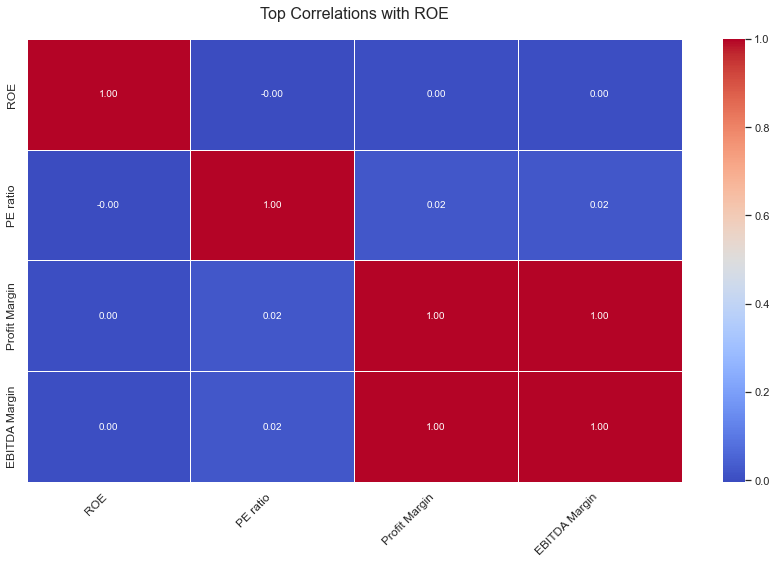

In [38]:
key_metric = "ROE"
top_corr_columns = corr[key_metric].abs().sort_values(ascending=False).head(10).index

filtered_corr = corr.loc[top_corr_columns, top_corr_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(
    filtered_corr, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.title(f"Top Correlations with {key_metric}", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

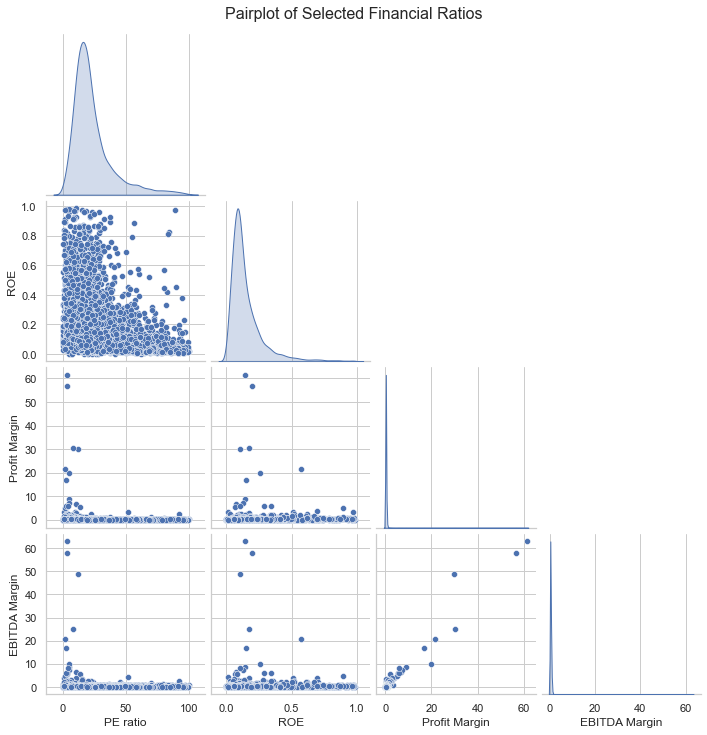

In [32]:
selected_columns = ["PE ratio", "ROE", "Profit Margin", "EBITDA Margin"]

filtered_df = df_combined[
    (df_combined["PE ratio"] > 0) & (df_combined["PE ratio"] <= 100) &
    (df_combined["ROE"] >= 0) & (df_combined["ROE"] <= 1) &
    (df_combined["Profit Margin"] >= -100) & (df_combined["Profit Margin"] <= 100) &
    (df_combined["EBITDA Margin"] >= 0) & (df_combined["EBITDA Margin"] <= 100)
][selected_columns]

sns.pairplot(filtered_df, diag_kind="kde", corner=True, palette="coolwarm")
plt.suptitle("Pairplot of Selected Financial Ratios", fontsize=16, y=1.02)
plt.show()


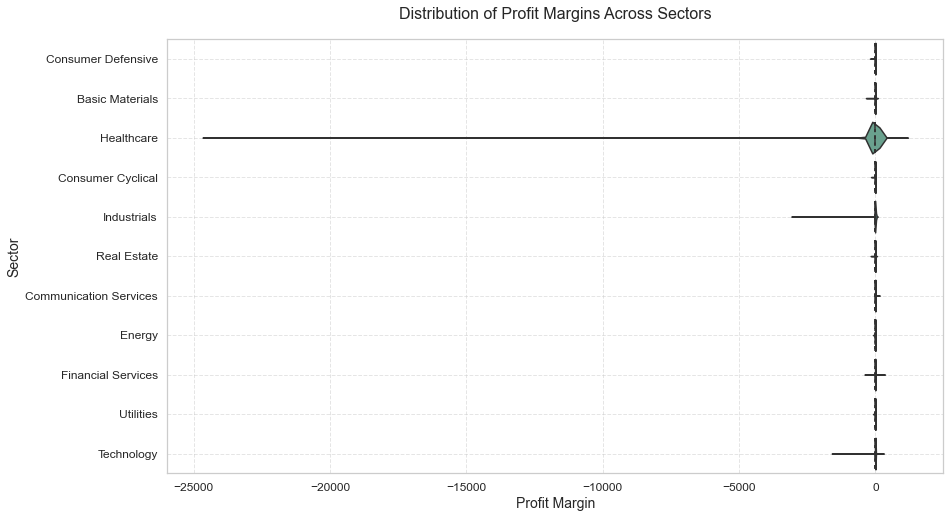

In [34]:
plt.figure(figsize=(14, 8))
sns.violinplot(
    x="Profit Margin",
    y="Sector",
    data=df_combined.dropna(subset=["Profit Margin", "Sector"]),
    scale="width",
    inner="quartile",
    palette="crest"
)
plt.title("Distribution of Profit Margins Across Sectors", fontsize=16, pad=20)
plt.xlabel("Profit Margin", fontsize=14)
plt.ylabel("Sector", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout(pad=3.0)
plt.show()

In [35]:
numerical_cols = ["PE ratio", "ROE", "Profit Margin", "EBITDA Margin"]
corr = df_combined[numerical_cols].corr()
filtered_corr = corr[(corr > 0.1) | (corr < -0.1)].fillna(0.0)

corr_table = filtered_corr.style.background_gradient(cmap="coolwarm", axis=None).format(precision=2)
corr_table.set_table_styles([
    {"selector": "th", "props": [("text-align", "center")]},
    {"selector": "td", "props": [("text-align", "center")]}
])
corr_table

,PE ratio,ROE,Profit Margin,EBITDA Margin
PE ratio,1.00,0.00,0.00,0.00
ROE,0.00,1.00,0.00,0.00
Profit Margin,0.00,0.00,1.00,1.00
EBITDA Margin,0.00,0.00,1.00,1.00


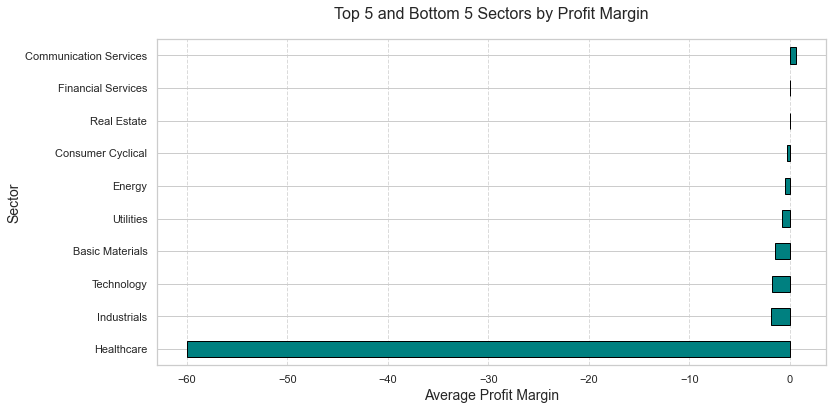

In [39]:
sector_performance = df_combined.groupby("Sector")["Profit Margin"].mean().sort_values()
top_5 = sector_performance.tail(5)
bottom_5 = sector_performance.head(5)
sector_data = pd.concat([bottom_5, top_5])

plt.figure(figsize=(12, 6))
sector_data.plot(kind="barh", color="teal", edgecolor="black")
plt.title("Top 5 and Bottom 5 Sectors by Profit Margin", fontsize=16, pad=20)
plt.xlabel("Average Profit Margin", fontsize=14)
plt.ylabel("Sector", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



# **Insights and Observations**  

The analysis of key financial ratios provides valuable insights into the financial health and performance trends of publicly listed companies. Below are some key takeaways:  

## **P/E Ratio Trends**  

- The Price-to-Earnings (P/E) ratio fluctuates across the years, reflecting market sentiment and valuation changes.  
- A noticeable dip in certain years may indicate economic downturns or industry-wide challenges.  
- The inclusion of standard deviation bands helps to visualise volatility in valuation over time.  

## **Return on Equity (ROE) and Its Correlations**  

- ROE shows strong correlations with key profitability and efficiency metrics.  
- Companies with higher ROE tend to have strong profit margins, suggesting that profitability drives shareholder returns.  
- The Debt-to-Equity ratio has a weaker correlation with ROE, indicating that highly leveraged companies don’t always generate higher returns.  

## **Sector-Wide Performance and Profit Margins**  

- Certain sectors consistently outperform others in terms of profit margins, highlighting industry-specific advantages.  
- The violin plot visualises the distribution of profit margins, revealing sectors with high variance, which may indicate volatile earnings.  

## **Market Capitalisation Over Time**  

- The line plot for Market Cap trends shows growth patterns, suggesting expanding industries and investor confidence.  
- Companies experiencing high volatility in Market Cap might be influenced by external market conditions, mergers, or acquisitions.  

## **Exploratory Data Analysis (EDA) Reveals Strong Patterns**  

- High correlations among financial ratios indicate interconnectedness in financial health indicators.  
- The pairplot identifies potential relationships between different financial ratios, allowing further in-depth analysis.  

 # **Insights and Observations**  

This analysis of key financial ratios provides a comprehensive view of the financial health and trends among publicly listed companies. Key findings:  

## **P/E Ratio Trends**  

- The Price-to-Earnings (P/E) ratio fluctuates over the years, reflecting market sentiment and valuation shifts.  
- Certain years show noticeable dips, potentially linked to economic downturns or sector-wide challenges.  
- The inclusion of standard deviation bands helps highlight the volatility in market valuation over time.  

## **Return on Equity (ROE) and Its Correlations**  

- ROE has strong correlations with key profitability and efficiency metrics, reinforcing its importance in assessing financial performance.  
- Companies with higher ROE often exhibit strong profit margins, suggesting that profitability is a key driver of shareholder returns.  
- The Debt-to-Equity ratio shows a weaker correlation with ROE, indicating that high leverage does not always translate to greater returns.  

## **Sector-Wide Performance and Profit Margins**  

- Some sectors consistently outperform others in terms of profit margins, highlighting industry-specific strengths and competitive advantages.  
- The violin plot visualises sectoral profit margins, revealing industries with high variability, which may indicate volatile earnings.  
- A closer look at sector performance shows that while some industries experience stable profitability, others face considerable swings.  

## **Market Capitalisation Over Time**  

- The trend in market capitalisation reflects overall growth patterns, indicating expanding industries and increasing investor confidence.  
- Companies with highly volatile market capitalisation may be responding to external market conditions, industry cycles, mergers, or acquisitions.  
- The use of a logarithmic scale helps illustrate differences in market cap across a broad range of companies.  

## **Debt-to-Equity and Sector Trends**  

- The bar plot comparing Debt-to-Equity ratios across sectors reveals significant variation, with some industries relying more on debt financing.  
- Sectors with lower Debt-to-Equity ratios may prioritise financial stability, whereas highly leveraged sectors may rely on debt for expansion.  

## **Profit Margins Across Sectors**  

- The top five sectors with the highest profit margins demonstrate strong profitability trends, while the bottom five highlight industries struggling with cost pressures.  
- This comparison provides useful insight into industry-wide challenges and competitive advantages that influence profitability.  

## **Exploratory Data Analysis (EDA) Reveals Strong Patterns**  

- The correlation heatmap identifies strong relationships between financial ratios, reinforcing their interconnected nature.  
- The pairplot highlights potential trends and dependencies between different financial ratios, providing a foundation for deeper financial analysis.  
- The analysis confirms that firms with strong financial fundamentals tend to maintain consistency across key financial indicators.  

## **Conclusion**  

This financial ratio analysis provides a solid foundation for understanding industry trends, market behaviours, and company-specific financial health. The interplay between profitability, leverage, and valuation reveals insightful relationships that can guide investment decisions. The visualisations not only help to contextualise these financial patterns but also offer a basis for further investigation into company-specific and sectoral dynamics.  